## Markowitz Portfolio Optimization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly_express as px
import pandas_datareader as web
from datetime import datetime as dt, timedelta as td
import yfinance as yf

In [2]:
# plt.rc\\\

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


end = dt.today()
start = end - td(days=2000)
stocks = 'AMZN TSLA META MSFT'.split()
df = yf.download(stocks, start=start, end=end, progress = False, threads=False)
ticker = yf.Ticker('TSLA')
info = ticker.info
info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [3]:
# remove multilevel
df.columns = ['_'.join(col) for col in df.columns]

# Just study adj close 
df = df.iloc[:,:4]

df

,Close_AMZN,Close_META,Close_MSFT,Close_TSLA
Date,,,,
2019-07-29,95.622498,195.194366,133.989487,15.718000
2019-07-30,94.926498,196.290176,133.343460,16.150667
2019-07-31,93.338997,193.490891,129.467133,16.107332
2019-08-01,92.765999,191.996582,131.167786,15.590000
2019-08-02,91.162003,188.300705,130.065689,15.622667
...,...,...,...,...
2025-01-08,222.130005,610.719971,424.559998,394.940002
2025-01-10,218.940002,615.859985,418.950012,394.739990
2025-01-13,218.460007,608.330017,417.190002,403.309998


In [23]:
px.line(df/df.iloc[0])

1376

In [5]:
ret_port = df.pct_change()
px.line(ret_port)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Close_AMZN<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Close_AMZN',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Close_AMZN',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2019, 7, 29, 0, 0),
                          datetime.datetime(2019, 7, 30, 0, 0),
                          datetime.datetime(2019, 7, 31, 0, 0), ...,
                          datetime.datetime(2025, 1, 13, 0, 0),
                          datetime.datetime(2025, 1, 14, 0, 0),
                          datetime.datetime(2025, 1, 15, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([        nan, -0.00727861, -0.01672348, ..., -0.00219236, -0.0032043 ,
                           0.02567052]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Close_META<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Close_META',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Close_META',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2019, 7, 29, 0, 0),
                          datetime.datetime(2019, 7, 30, 0, 0),
                          datetime.datetime(2019, 7, 31, 0, 0), ...,
                          datetime.datetime(2025, 1, 13, 0, 0),
                          datetime.datetime(2025, 1, 14, 0, 0),
                          datetime.datetime(2025, 1, 15, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([        nan,  0.00561394, -0.01426096, ..., -0.01222675, -0.02314536,
                           0.03848548]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Close_MSFT<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Close_MSFT',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Close_MSFT',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2019, 7, 29, 0, 0),
                          datetime.datetime(2019, 7, 30, 0, 0),
                          datetime.datetime(2019, 7, 31, 0, 0), ...,
                          datetime.datetime(2025, 1, 13, 0, 0),
                          datetime.datetime(2025, 1, 14, 0, 0),
                          datetime.datetime(2025, 1, 15, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([        nan, -0.00482147, -0.02907025, ..., -0.004201  , -0.0036434 ,
                           0.02559719]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Close_TSLA<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Close_TSLA',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Close_TSLA',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2019, 7, 29, 0, 0),
                          datetime.datetime(2019, 7, 30, 0, 0),
                          datetime.datetime(2019, 7, 31, 0, 0), ...,
                          datetime.datetime(2025, 1, 13, 0, 0),
                          datetime.datetime(2025, 1, 14, 0, 0),
                          datetime.datetime(2025, 1, 15, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([        nan,  0.02752683, -0.00268317, ...,  0.02171051, -0.01723243,
                           0.08038151]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegro

## Security Weighting

In [34]:
weights = np.random.random((4,1))
weights /= np.sum(weights)
weights_flat = weights.flatten()

# Format weights as percentages
formatted_weights = [f'{weight:.2%}' for weight in weights_flat]

print(f'Normalized Weights: {weights}')

#Log return
log_ret = np.log(df/df.shift(1))

# Expected return (weighted sum of mean returns). Mult by 252 as we always do annual calculation and year has 252 business days
exp_ret = log_ret.mean().dot(weights)*252 
print(f'\nExpected return of the portfolio is : {exp_ret[0]}')

# Exp Volatility (Risk)
exp_vol = np.sqrt(weights.T.dot(252*log_ret.cov().dot(weights)))
print(f'\nVolatility of the portfolio: {exp_vol[0][0]}')

# Sharpe ratio
sr = exp_ret / exp_vol
print(f'\nSharpe ratio of the portfolio: {sr[0][0]}')

Normalized Weights: [[0.29983978]
 [0.36453553]
 [0.00798768]
 [0.327637  ]]

Expected return of the portfolio is : 0.32365935922116645

Volatility of the portfolio: 0.38335960794110785

Sharpe ratio of the portfolio: 0.844270894785784


TypeError: 'DataFrame' object is not callable

## Monte Carlo Sim for initializing weights and optimising 

In [38]:
# number of simulation
n = 50_000
# n = 10

#Set all to zero

port_weights = np.zeros(shape=(n,len(df.columns)))
port_volatility = np.zeros(n)
port_sr = np.zeros(n)
port_return = np.zeros(n)

num_securities = len(df.columns)
# num_securities
for i in range(n):
    # Weight each security
    weights = np.random.random(4)
    # normalize it, so that sum is one
    weights /= np.sum(weights)
    port_weights[i,:] = weights 
    #     print(f'Normalized Weights : {weights.flatten()}')

    # Expected return (weighted sum of mean returns). Mult by 252 as we always do annual calculation and year has 252 business days
    exp_ret = log_ret.mean().dot(weights)*252 
    port_return[i] = exp_ret
#     print(f'\nExpected return is : {exp_ret[0]}')

    # Exp Volatility (Risk)
    exp_vol = np.sqrt(weights.T.dot(252*log_ret.cov().dot(weights)))
    port_volatility[i] = exp_vol
#     print(f'\nVolatility : {exp_vol[0][0]}')

    # Sharpe ratio
    sr = exp_ret / exp_vol
    port_sr[i] = sr
#     print(f'\nSharpe ratio : {sr[0][0]}')

weights

array([0.28469727, 0.44130182, 0.02659472, 0.24740619])

In [8]:
# Index of max Sharpe Ratio
max_sr = port_sr.max()
ind = port_sr.argmax()
# Return and Volatility at Max SR
max_sr_ret = port_return[ind]
max_sr_vol = port_volatility[ind]

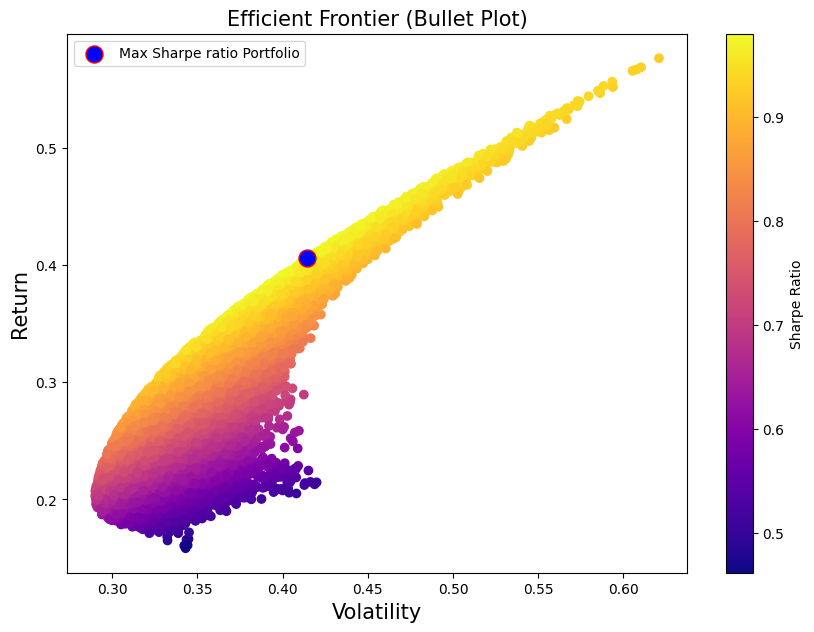

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(port_volatility,port_return,c=port_sr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.title('Efficient Frontier (Bullet Plot)', fontsize=15)
plt.scatter(max_sr_vol, max_sr_ret, c='blue', s=150, edgecolors='red', marker='o', label='Max \
Sharpe ratio Portfolio')
plt.legend();

In [35]:
for weight, stock in zip(port_weights[ind],stocks):
    print(f'{round(weight * 100, 2)} % of {stock} should be bought.')
    
# best portfolio return
print(f'\nMarkowitz optimal portfolio return is : {round(max_sr_ret * 100, 2)}% with volatility \
{max_sr_vol}')

0.37 % of AMZN should be bought.
0.98 % of TSLA should be bought.
49.28 % of META should be bought.
49.38 % of MSFT should be bought.

Markowitz optimal portfolio return is : 40.62% with volatility 0.4145020908735865


## Sharpe Ratio Optimisation for Frontier Analysis

In [11]:
from scipy import optimize as oz

In [12]:
log_mean = log_ret.mean()*252
cov = log_ret.cov()*252

In [13]:
# Some helper functions
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = log_mean.dot(weights)
    vol = np.sqrt(weights.T.dot(cov.dot(weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

# Negate Sharpe ratio as we need to max it but Scipy minimize the given function
def neg_sr(weights):
    return get_ret_vol_sr(weights)[-1] * -1

# check sum of weights 
def check_sum(weights):
    return np.sum(weights) - 1

# Constraints for the optimization problem
cons = {'type':'eq','fun':check_sum}
# bounds on weights
bounds = ((0,1),(0,1),(0,1),(0,1))
# initial guess for optimization to start with
init_guess = [.25 for _ in range(4)]


# Call minimizer
opt_results = oz.minimize(neg_sr, init_guess, constraints=cons, bounds=bounds, method='SLSQP')

In [36]:
optimal_weights = opt_results.x
# optimal_weights
for st, i in zip(stocks,optimal_weights):
    print(f'Stock {st} has weight {np.round(i*100,2)} %')

Stock AMZN has weight 0.0 %
Stock TSLA has weight 0.0 %
Stock META has weight 52.11 %
Stock MSFT has weight 47.89 %


In [37]:
mc_weights = port_weights[ind]
for st, i in zip(stocks,mc_weights):
    print(f'Stock {st} has weight {np.round(i*100,2)} %')

Stock AMZN has weight 0.37 %
Stock TSLA has weight 0.98 %
Stock META has weight 49.28 %
Stock MSFT has weight 49.38 %


In [16]:
# Comparing two results we see that we get very close results
(optimal_weights - mc_weights)

array([-0.0036617 , -0.00976046,  0.0283446 , -0.01492244])

In [17]:
get_ret_vol_sr(optimal_weights), get_ret_vol_sr(mc_weights)

print('For a given portfolio we have: (Using SciPy optimizer)\n \n')
for i, j in enumerate('Return Volatility SharpeRatio'.split()):
    print(f'{j} is : {get_ret_vol_sr(optimal_weights)[i]}\n')
    
print('For a given portfolio we have: (Using Monte Carlo)\n \n')
for i, j in enumerate('Return Volatility SharpeRatio'.split()):
    print(f'{j} is : {get_ret_vol_sr(mc_weights)[i]}\n')

For a given portfolio we have: (Using SciPy optimizer)
 

Return is : 0.40058366383723587

Volatility is : 0.40848104600155727

SharpeRatio is : 0.9806664660658666

For a given portfolio we have: (Using Monte Carlo)
 

Return is : 0.40623785445908306

Volatility is : 0.4145020908735866

SharpeRatio is : 0.9800622563879324



In [18]:
frontier_y = np.linspace(port_return.min(), port_return.max(), 100)
frontier_vol = []

def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

for possible_ret in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun':lambda w:get_ret_vol_sr(w)[0] - possible_ret})
    result = oz.minimize(minimize_vol, init_guess, method='SLSQP', constraints=cons, bounds=bounds)
    frontier_vol.append(result['fun'])

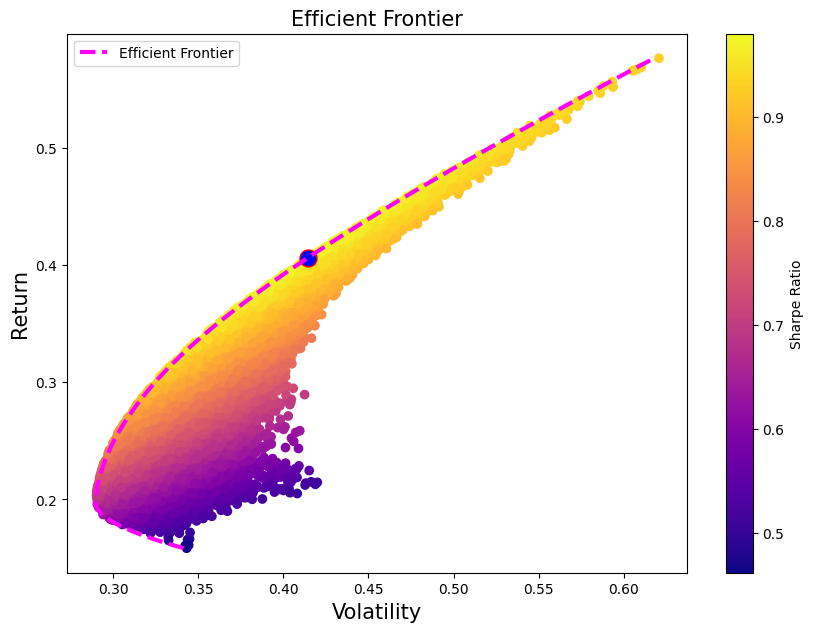

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(port_volatility,port_return,c=port_sr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.title('Efficient Frontier', fontsize=15)
plt.scatter(max_sr_vol, max_sr_ret, c='blue', s=150, edgecolors='red', marker='o')

plt.plot(frontier_vol, frontier_y, c='magenta', ls='--', lw=3, label='Efficient Frontier')
plt.legend();